In [1]:
# HIDDEN
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import Image
%matplotlib inline
sns.set()
sns.set_context('talk')

# Least Squares - A geometric perspective

Recall that we found the optimal coefficients for linear models by optimizing their loss functions with gradient descent. We also mentioned that least squares linear regression can be solved analytically. While gradient descent is practical, this geometric perspective will provide a deeper understanding of linear regression.

A review of vectors and vector spaces is included at the bottom. We will assume familiarity with vector arithmetic, the 1-vector, span of a collection of vectors, and projections.

## Case Study

We've been tasked with finding a good linear model for the below data:

| x | y |
| - |:-|
| 3 | 2 |
| 0 | 1 |
| -1 | -2 |

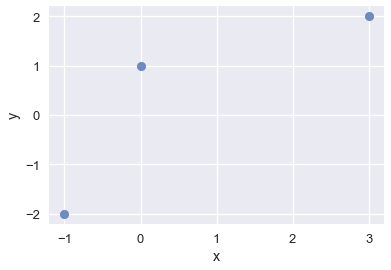

In [2]:
# HIDDEN
data = pd.DataFrame(
    [
        [3,2],
        [0,1],
        [-1,-2]
    ],
    columns=['x', 'y']
)

sns.regplot(x='x', y='y', data=data, ci=None, fit_reg=False);

Assume that the best model is one with the least error, and that the least squares error is an acceptable measure.

### Least Squares: Constant Model
Like we did with the tips dataset, let's start with the constant model: the model that only ever predicts a single number.

$$ f = \hat{\theta} $$

Our goal is to find the $\hat{\theta}$ that results in the line that minimizes the least squares loss:

$$ L(\hat{\theta}, \vec{y}) = \sum_{i = 1}^{n}(y_i - \hat{\theta})^2\\ $$

Recall that for the constant model, the minimizing $\theta$ for the MSE cost is $\bar{y}$, the average of the $y$ values.

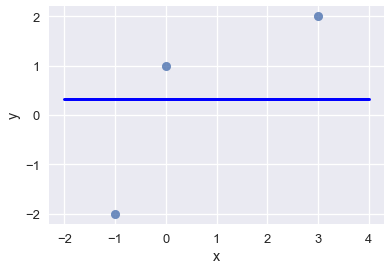

In [3]:
#HIDDEN
sns.regplot(x='x', y='y', data=data, ci=None, fit_reg=False);
plt.plot([-2, 4], [0.333, 0.333], color='b', linewidth=3);

Notice that our loss function is a sum of squares. The *L2*-norm for a vector is also a sum of squares, but with a square root: 

$$\Vert \vec{v} \Vert = \sqrt{v_1^2 + v_2^2 + \dots + v_n^2}$$ 

If we let $y_i - \hat{\theta} = v_i$:

$$
\begin{aligned}
L(\hat{\theta}, \vec{y}) 
&= v_1^2 + v_2^2 + \dots + v_n^2 \\
&= \Vert \vec{v} \Vert^2
\end{aligned}
$$

This means our loss can be expressed as the *L2*-norm of some vector $v$, squared. We can express $v_i$ as $y_i - \hat{\theta} \quad \forall i \in [1,n]$ so that in Cartesian notation, 

$$
\begin{aligned}
\vec{v} \quad &= \quad \begin{bmatrix} y_1 - \hat{\theta} \\ y_2 - \hat{\theta} \\ \vdots \\ y_n - \hat{\theta} \end{bmatrix} \\
&= \quad \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_n  \end{bmatrix} \quad - \quad 
\begin{bmatrix} \hat{\theta} \\ \hat{\theta} \\ \hat{\theta} \end{bmatrix} \\
&= \quad \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_n  \end{bmatrix} \quad - \quad 
\begin{bmatrix} 1 \\ 1 \\ \vdots \\ 1 \end{bmatrix}
\hat{\theta}
\end{aligned}
$$

So our loss function can be written as:

$$ 
\begin{aligned}
L(\hat{\theta}, \vec{y})
\quad &= \quad \left \Vert  \qquad   
\begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_n  \end{bmatrix} \quad - \quad 
\begin{bmatrix} 1 \\ 1 \\ \vdots \\ 1 \end{bmatrix}
\hat{\theta}
\qquad \right \Vert ^2 \\
\quad &= \quad \left \Vert  \qquad  
\vec{y} 
\quad - \quad 
\hat{y}
\qquad \right \Vert ^2 \\
\end{aligned}
$$

The expression $\begin{bmatrix} 1 \\ 1 \\ 1 \end{bmatrix} \ \hat{\theta}$  is a scalar multiple of the columns of the $\vec{1}$ vector, and is the result of our predictions, denoted $\hat{y}$.

This gives us a new perspective on what it means to minimize the least squares error.

$\vec{y}$ and $\vec{1}$ are fixed, but $\hat{\theta}$ can take on any value, so $\hat{y}$ can be any scalar multiple of $\vec{1}$. We want to find $\hat{\theta}$ so that $\hat{\theta} \ \vec{1}$ is closest to $\vec{y}$.

<img src="../../notebooks-images/linear_projection__1dprojection.png" width="300" />

The projection of $\vec{y}$ onto $\vec{1}$ is guaranteed to be the closest vector (see "Vector Space Review").

### Least Squares: Simple Linear Model
Now, let's look at the simple linear regression model. This is strongly parallel to the constant model derivation, but be mindful of the differences and think about how you might generalize to multiple linear regression.

The simple linear model is:

$$
\begin{aligned}
f_\hat{\theta} (x_i) 
&= \hat{\theta_0} + \hat{\theta_1} x_i \\
\end{aligned}
$$

Our goal is to find the $\hat{\theta}$ that results in the line with the least squared error:

$$
\begin{aligned}
L(\hat{\theta}, \vec{x}, \vec{y})
&= \sum_{i = 1}^{n}(y_i - f_\hat{\theta} (x_i))^2\\
&= \sum_{i = 1}^{n}(y_i - \hat{\theta_0} - \hat{\theta_1} x_i)^2\\
&= \sum_{i = 1}^{n}(y_i - \begin{bmatrix} 1 & x_i \end{bmatrix}
\begin{bmatrix} 
     \hat{\theta_0} \\
     \hat{\theta_1}
\end{bmatrix} ) ^2
\end{aligned}
$$

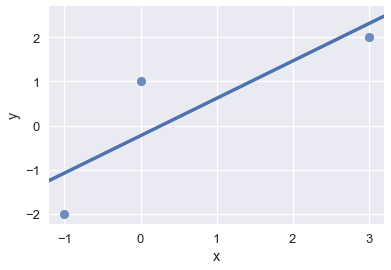

In [4]:
# HIDDEN
data = pd.DataFrame(
    [
        [3,2],
        [0,1],
        [-1,-2]
    ],
    columns=['x', 'y']
)

sns.regplot(x='x', y='y', data=data, ci=None);

To help us visualize the translation of our loss summation into matrix form, let's expand out the loss with $n = 3$.

$$
\begin{aligned}
L(\hat{\theta}, \vec{x}, \vec{y})
&=
(y_1 - \begin{bmatrix} 1 & x_1 \end{bmatrix}
\begin{bmatrix} 
     \hat{\theta_0} \\
     \hat{\theta_1}
\end{bmatrix})^2  \\
&+
(y_2 - \begin{bmatrix} 1 & x_2 \end{bmatrix}
\begin{bmatrix} 
     \hat{\theta_0} \\
     \hat{\theta_1}
\end{bmatrix})^2 \\
&+
(y_3 - \begin{bmatrix} 1 & x_3 \end{bmatrix}
\begin{bmatrix} 
     \hat{\theta_0} \\
     \hat{\theta_1}
\end{bmatrix})^2 \\
\end{aligned}
$$

Again, our loss function is a sum of squares and the *L2*-norm for a vector is the square root of a sum of squares: 

$$\Vert \vec{v} \Vert = \sqrt{v_1^2 + v_2^2 + \dots + v_n^2}$$ 

If we let $y_i - \begin{bmatrix} 1 & x_i \end{bmatrix}
\begin{bmatrix} 
     \hat{\theta_0} \\
     \hat{\theta_1}
\end{bmatrix} = v_i$: 

$$
\begin{aligned}
L(\hat{\theta}, \vec{x}, \vec{y}) 
&= v_1^2 + v_2^2 + \dots + v_n^2 \\
&= \Vert \vec{v} \Vert^2
\end{aligned}
$$

As before, our loss can be expressed as the *L2*-norm of some vector $v$, squared. With each component $v_i = y_i - \begin{bmatrix} 1 & x_i \end{bmatrix}
\begin{bmatrix} 
     \hat{\theta_0} \\
     \hat{\theta_1}
\end{bmatrix} \quad \forall i \in [1,3]$:

$$ 
\begin{aligned}
L(\hat{\theta}, \vec{x}, \vec{y})
&= \left \Vert  \qquad   
\begin{bmatrix} y_1 \\ y_2 \\ y_3  \end{bmatrix} \quad - \quad 
\begin{bmatrix} 1 & x_1 \\ 1 & x_2 \\ 1 & x_3 \end{bmatrix}
\begin{bmatrix} 
     \hat{\theta_0} \\
     \hat{\theta_1}
\end{bmatrix}
\qquad \right \Vert ^2 \\
&= \left \Vert  \qquad  
\vec{y} 
\quad - \quad 
X 
\begin{bmatrix} 
     \hat{\theta_0} \\
     \hat{\theta_1}
\end{bmatrix}
\qquad \right \Vert ^2 \\
&= \left \Vert  \qquad  
\vec{y} 
\quad - \quad 
f_\hat{\theta}
\qquad \right \Vert ^2 \\
\end{aligned}
$$

The matrix multiplication $\begin{bmatrix} 1 & x_1 \\ 1 & x_2 \\ 1 & x_3 \end{bmatrix}
\begin{bmatrix} 
     \hat{\theta_0} \\
     \hat{\theta_1}
\end{bmatrix}$ is a linear combination of the columns of $X$: each $\hat{\theta_i}$ only ever multiplies with one column of $X$—this perspective shows us that $f_\hat{\theta}$ is a linear combination of the features of our data. In summary, simple linear regression fits $f_\hat{\theta}$ to $\vec{1}$ and $\vec{x}$.

$X$ and $\vec{y}$ are fixed, but $\hat{\theta_0}$ and $\hat{\theta_1}$ can take on any value, so $f_\hat{\theta}$ can take on any of the infinite linear combinations of the columns of $X$. To have the smallest loss, we want to choose $\hat{\theta_0}$ and $\hat{\theta_1}$ such that the resulting vector is as close to $\vec{y}$ as possible.

## Geometric Intuition

Now, let's develop an intuition for why it matters that $\hat{y}$ is restricted to the linear combinations of the columns of $X$. Although the span of any set of vectors includes an infinite number of linear combinations, infinite does not mean any—the linear combinations are restricted by the basis vectors.

As a reminder, here is our loss function and scatter plot:

$$L(\hat{\theta}, \vec{x}, \vec{y}) \quad = \quad \left \Vert  \quad  
\vec{y} 
\quad - \quad 
X \hat{\theta}
\quad \right \Vert ^2$$

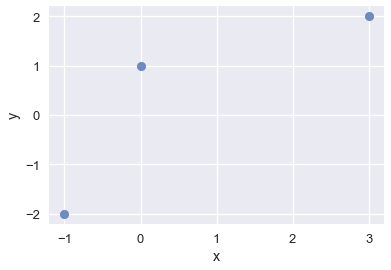

In [5]:
# HIDDEN
sns.regplot(x='x', y='y', data=data, ci=None, fit_reg=False);

By inspection, we see that no line can perfectly fit our points, so we cannot achieve 0 loss. Thus, we know that $\vec{y}$ is not in the plane spanned by $\vec{x}$ and $\vec{1}$, represented as a parallelogram below.

<img src="../../notebooks-images/linear_projection1.png" width="500" />

Since our error is based on distance, we can see that to minimize $ L(\hat{\theta}, \vec{x}, \vec{y}) = \left \Vert  \vec{y} - X \hat{\theta} \right \Vert ^2$, we want $X \hat{\theta}$ to be as close to $\vec{y}$ as possible.

Mathematically, we are looking for the projection of $\vec{y}$ onto the vector space spanned by the columns of $X$, as the projection of any vector is the closest point in $Span(X)$ to that vector. Thus, choosing $\hat{\theta}$ such that $\hat{y} = X \hat{\theta} = $ proj$_{Span(X)} \quad $ $y$ is the best solution.
<img src="../../notebooks-images/linear_projection2.png" width="500" />

To see why, consider other points on the vector space, in purple.
<img src="../../notebooks-images/linear_projection3.png" width="500" />

By the Pythagorean Theorem, any other point on the plane is farther from $\vec{y}$ than $\hat{y}$ is. The length of the perpendicular corresponding to $\hat{y}$ represents the least squared error.

## Linear Algebra

Since we've snuck in a lot of linear algebra concepts already, all that's left is solving for the $\hat{\theta}$ that yields our desired $\hat{y}$.

A couple things to note: 

<img src="../../notebooks-images/linear_projection5.png" width="500" />

- $\hat{y} + e = \vec{y}$
- $\vec{e}$ is perpendicular to $\vec{x}$ and $\vec{1}$
- $\hat{y} = X \hat{\theta^*}$ is the vector closest to $y$ in the vector space spanned by $\vec{x}$ and $\vec{1}$

Thus, we arrive at the equation:

$$X  \hat{\theta^*} + \vec{e} = \vec{y}$$

Left-multiplying both sides by $X^T$:

$$X^T X  \hat{\theta^*} + X^T \vec{e} = X^T \vec{y}$$

Since $\vec{e}$ is perpendicular to the columns of $X$, $X^T \vec{e}$ is a column vector of $0$'s. Thus, we arrive at the Normal Equation:

$$X^T X  \hat{\theta^*} = X^T \vec{y}$$

From here, we can easily solve for $\hat{\theta^*}$ by left-multiplying both sides by $(X^T X)^{-1}$:

$$\hat{\theta^*} = (X^T X)^{-1} X^T \vec{y}$$

## Finishing up the Case Study

Let's return to our case study, apply what we've learned, and explain why our solution is sound.

$$
\vec{y} = \begin{bmatrix} 2 \\ 1 \\ -2  \end{bmatrix} \qquad X = \begin{bmatrix} 1 & 3 \\ 1 & 0 \\ 1 & -1 \end{bmatrix}
$$


$$
\begin{align}
\hat{\theta^*} 
&= 
\left(
\begin{bmatrix} 1 & 1 & 1 \\ 3 & 0 & -1 \end{bmatrix}
\begin{bmatrix} 1 & 3 \\ 1 & 0 \\ 1 & -1 \end{bmatrix}
\right)^{-1}
\begin{bmatrix} 1 & 1 & 1 \\ 3 & 0 & -1 \end{bmatrix}
\begin{bmatrix} 2 \\ 1 \\ -2  \end{bmatrix} \\
&= 
\left(
\begin{bmatrix} 3 & 2\\ 2 & 10 \end{bmatrix}
\right)^{-1}
\begin{bmatrix} 1 \\ 8 \end{bmatrix} \\
&=
\frac{1}{30-4}
\begin{bmatrix} 10 & -2\\ -2 & 3 \end{bmatrix}
\begin{bmatrix} 1 \\ 8 \end{bmatrix} \\
&=
\frac{1}{26}
\begin{bmatrix} -6 \\ 22 \end{bmatrix}\\
&=
\begin{bmatrix} - \frac{3}{13} \\ \frac{11}{13} \end{bmatrix}
\end{align}
$$

We have analytically found that best model for least squares regression is $f_\hat{\theta} (x_i) = - \frac{3}{13} + \frac{11}{13} x_i$. We know that our choice of $\hat{\theta}$ is sound by the mathematical property that the projection of $\vec{y}$ onto the span of the columns of $X$ yields the closest point in the vector space to $\vec{y}$. Under linear constraints using the least squares metric, solving for $\hat{\theta}$ by taking the projection guarantees us the optimal solution.

## When Variables are Linearly Dependent

For every additional variable, we add one column to $X$. The span of the columns of $X$ is the linear combinations of the column vectors, so adding columns only changes the span if it is linearly independent from all existing columns.

When the added column is linearly dependent, it can be expressed as a linear combination of some other columns, and thus will not introduce new any vectors to the subspace.

Recall that the span of $X$ is important because it is the subspace we want to project $\vec{y}$ onto. If the subspace does not change, then the projection will not change.

For example, when we introduced $\vec{x}$ to the constant model to get the simple linear model, we introduced a independent variable. $\vec{x} = \begin{bmatrix} 3 \\ 0 \\ -1 \end{bmatrix}$ cannot be expressed as a scalar of $\begin{bmatrix} 1 \\ 1 \\ 1 \end{bmatrix}$. Thus, we moved from finding the projection of $\vec{y}$ onto a line:

<img src="../../notebooks-images/linear_projection__1dprojection.png" width="250" />

to finding the projection of $\vec{y}$ onto a plane:

<img src="../../notebooks-images/linear_projection1.png" width="500" />


Now, lets introduce another variable, $\vec{z}$:

| x | z |  y |
| - |:-| - |
| 3 | 4 | 2 |
| 0 | 1 | 1 |
| -1 | 0 | -2 |

But since $\vec{z} = \vec{1} + \vec{x}$, $\vec{z}$ is linearly dependent on the existing columns and therefore does not change $Span(X)$. In fact, $\vec{z}$ lies in the original $Span(X)$:

<img src="../../notebooks-images/linear_projection__dependent_variablesz.png" width="500" />

Notice that $\vec{z} = \vec{1} + \vec{x}$. Since $\vec{z}$ is a linear combination of $\vec{1}$ and $\vec{x}$, it lies in the original $Span(X)$. Furthermore, we can say that the original $Span(X)$ is the same as the new $Span(X)$. Thus, the projection of $\vec{y}$ onto the subspace spanned by $\vec{1}$, $\vec{x}$, and $\vec{z}$ would be the same as the projection of $\vec{y}$ onto the subspace spanned by $\vec{1}$ and $\vec{x}$.

We can also observe this from minimizing the loss function:

$$ 
\begin{aligned}
L(\hat{\theta}, \vec{d}, \vec{y})
&= \left \Vert  \qquad   
\begin{bmatrix} y_1 \\ y_2 \\ y_3  \end{bmatrix} \quad - \quad 
\begin{bmatrix} 1 & x_1 & z_1 \\ 1 & x_2 & z_2\\ 1 & x_3 & z_3\end{bmatrix}
\begin{bmatrix} 
     \hat{\theta_0} \\
     \hat{\theta_1} \\
     \hat{\theta_2}
\end{bmatrix}
\qquad \right \Vert ^2 \\
&= \left \Vert  \qquad   
\begin{bmatrix} y_1 \\ y_2 \\ y_3  \end{bmatrix} \quad - \quad 
\begin{bmatrix} 1 & 3 & 4\\ 1 & 0 & 1\\ 1 & -1 & 0\end{bmatrix}
\begin{bmatrix} 
     \hat{\theta_0} \\
     \hat{\theta_1} \\
     \hat{\theta_2}
\end{bmatrix}
\qquad \right \Vert ^2 \\
\end{aligned}
$$


Our possible solutions follow the form $\theta_0 \begin{bmatrix} 1 \\ 1 \\ 1 \end{bmatrix} + \theta_1 \begin{bmatrix} 3 \\ 0 \\ -1 \end{bmatrix} + \theta_2 \begin{bmatrix} 4 \\ 1 \\ 0 \end{bmatrix}$.


Since $\vec{z} = \vec{1} + \vec{x}$, regardless of $\theta_0$, $\theta_1$, and $\theta_2$, the possible values can be rewritten as:
$$ (\theta_0 + \theta_2) \begin{bmatrix} 1 \\ 1 \\ 1 \end{bmatrix} + (\theta_1 + \theta_2) \begin{bmatrix} 3 \\ 0 \\ -1 \end{bmatrix}$$

So adding $\vec{z}$ does not change the problem at all. The only difference is, we can express this projection in multiple ways. Recall that we found the projection of $\vec{y}$ onto the plane spanned by $\vec{1}$ and $\vec{x}$ to be:

$$ \begin{bmatrix} \vec{1} & \vec{x} \end{bmatrix}  \begin{bmatrix} - \frac{3}{13} \\ \frac{11}{13} \end{bmatrix} = - \frac{3}{13} \vec{1} + \frac{11}{13} \vec{x}$$

However, with the introduction of $\vec{z}$, we have more ways to express this same projection vector. 

Since $\vec{1} = \vec{z} - \vec{x}$, $\hat{y}$ can also be expressed as:

$$ - \frac{3}{13} (\vec{z} - \vec{x}) + \frac{11}{13} \vec{x} = - \frac{3}{13} \vec{z} + \frac{14}{13} \vec{x} $$

Since $\vec{x} = \vec{z} + \vec{1}$, $\hat{y}$ can also be expressed as:

$$ - \frac{3}{13} \vec{1} + \frac{11}{13} (\vec{z} + \vec{1}) = \frac{8}{13} \vec{1} + \frac{11}{13} \vec{z} $$

But all three expressions represent the same projection.

In conclusion, adding a linearly dependent column to $X$ does not change $Span(X)$, and thus will not change the projection and solution to the least squares problem.

## Vector Space Review
- Definition of a vector
- Scaling vectors
- Adding vectors
- Vector notations
- The $\vec{1}$ vector

- Span of a set of vectors
- Vector space
- Vector subspace


- Angles between vectors
- Vector length
- Distance between of vectors
- Orthogonal vectors
- Projections of vectors

#### Vector Definition
A vector is defined by a length and a direction.

<img src="../../notebooks-images/vector_space_review__vectors.png" width="500" />

Notice that $\vec{x}$ and $\vec{y}$ have the same length and direction. They are equal vectors.

#### Scaling and Adding Vectors
To scale a vector is to change it's length.

<img src="../../notebooks-images/vector_space_review__scaling.png" width="500" />

Notice that $\vec{2x}$ and $\vec{y}$ have the direction but different lengths. They are not equal.

To add two vectors $\vec{y} + \vec{z}$, take one step according to the length of $\vec{y}$, then immediately take one step according to the length of $\vec{z}$ (or vice versa). This is also known as triangle method, where you place the initial point of a vector on the terminal point of the other.

<img src="../../notebooks-images/vector_space_review__adding.png" width="300" />

#### Vector Notations
Vectors are usually represented as Cartesian Coordinates.

<img src="../../notebooks-images/vector_space_review__notation.png" width="500" />

$$ \vec{x} = \begin{bmatrix} 1 \\ 4  \end{bmatrix} , \quad 
   \vec{y} = \begin{bmatrix} 3 \\ 2  \end{bmatrix} , \quad 
   \vec{z} = \begin{bmatrix} 4 \\ 0  \end{bmatrix}$$
   
In this notation, arithmetic operations we saw earlier become quite easy.

$$ \vec{2x} = \begin{bmatrix} 2 \\ 8  \end{bmatrix} , \quad
   \vec{-0.5z} = \begin{bmatrix} -2 \\ 0  \end{bmatrix} , \quad
   \vec{2x + -0.5z} = \begin{bmatrix} 0 \\ 8  \end{bmatrix}
$$

<img src="../../notebooks-images/vector_space_review__notation_arithmetic.png" width="500" />


Vectors can be added and scaled element-wise:

$$a \vec{x} + b \vec{y} = \begin{bmatrix} a \ x_1 & + & b \  y_1 \\
                                            & \vdots & \\
                                          a \  x_n & + & b \  y_n
                          \end{bmatrix}
$$

#### The $\vec{1}$ Vector
In any $d$ dimensional space, $\vec{1}$ is the vector of all $1$'s: 
$ \begin{bmatrix} 1 \\ \vdots \\ 1  \end{bmatrix}$

#### Span
The span of a set of vectors $\{\vec{v_1}, \vec{v_2}, \dots, \vec{v_p}\}$ is the set of all possible linear combinations. For these $p$ vectors:

$$ \{ c_1 \ \vec{v_1} + c_2 \ \vec{v_2} + \dots + c_p \ \vec{v_p} \ : \ \forall c_i \in F\}$$

where $F$ is the field of the vector space (out of scope).

#### Vector Spaces
A vector space $V$ is the span of a set of vectors $\{\vec{v_1}, \vec{v_2}, \dots, \vec{v_p}\}$, where each $\vec{v_i}$ is a $n \times 1$ dimensional column vector.

#### Vector Subspaces
A subspace $U$ of $V$ is the span of a set of vectors $\{\vec{u_1}, \dots, \vec{u_q}\}$ where each $\vec{u_i} \in V$. This means every vector in $U$ is also in $V$.

#### Vector Angles
When you put any two vectors terminal end to terminal end without changing their direction, you can measure the angle between them.

<img src="../../notebooks-images/vector_space_review__angle.png" width="300" />


#### Vector Length

Intuition in $\mathbb{R}^2$ :

Recall the triangle method of adding two vectors. If we add two perpendicular vectors $\vec{a} + \vec{b}$ in $\mathbb{R}^2$, then we know that the resulting vector will be the hypotenuse. In this case, we also know that the length of $\vec{a} + \vec{b}$ will follow the Pythagorean Theorem: $\sqrt{a^2 + b^2}$.

<img src="../../notebooks-images/vector_space_review__length.png" width="400" />


General Formula for  Length of $\vec{v} \in \mathbb{R}^n$ :
$$\begin{aligned} || \vec{v} || \quad
&=  \quad \sqrt{v_1^2 + v_2^2 + \dots + v_n^2}  \\
&= \quad \sqrt{\vec{v} \cdot \vec{v}}
\end{aligned}
$$

Where the final operator is the dot product.

$$ \begin{aligned}
\vec{x} \cdot \vec{y} \quad 
&= \quad x_1 \ y_1 + x_2 \ y_2 + \dots + x_n \ y_n \\
&= \quad||x|| \ ||y|| \ \cos{\theta}
\end{aligned}
$$

The first expression is known as the algebraic definition of the dot product, and the second is the geometric definition. Note that the dot product is the inner product defined for vectors in $\mathbb{R}^n$. 

#### Distance Between Two Vectors
$$dist(\vec{x},\vec{y}) \quad = \quad || \vec{x} - \vec{y} ||$$

<img src="../../notebooks-images/vector_space_review__distance.png" width="500" />


#### Orthogonal Vectors
For two non-zero vectors to be orthogonal, they must satisfy the property that $\vec{x} \cdot \vec{y} = 0$. Since they have non-zero length, the only way for the two vectors to be orthogonal is if $\cos{\theta} = 0$. One satisfying $\theta$ is 90 degrees, our familiar right angle.

#### Projections
To project one vector $\vec{x}$ onto another vector $\vec{y}$, we want to find $k \ \vec{y}$ that is closest to $\vec{x}$.

<img src="../../notebooks-images/vector_space_review__projection.png" width="400" />


By the Pythagorean Theorem, we know that $k$ must be the scalar such that $\vec{x} - k \ \vec{y}$ is perpendicular to $\vec{y}$, so  $k \ \vec{y}$ is the (orthogonal) projection of $\vec{x}$ onto $\vec{y}$.

Likewise, to project one vector $\vec{x}$ onto any vector space spanned by some set of vectors $\{\vec{v_1}, \vec{v_2}, \dots, \vec{v_p}\}$, we still find the linear combination $k_1 \ \vec{v_1} + k_2 \ \vec{v_2} + \dots + k_p \ \vec{v_p}\}$ that is closest to $\vec{x}$.

<img src="../../notebooks-images/vector_space_review__proj2d.png" width="500" />
